# Assignment 2 - Machine Learning Basics

## *Ruiqi Wang*
Netid:  *rw195*

Github link: *https://github.com/Ruiqi22Wang/machine-learning-course*

## Learning Objectives:
1. Be able to apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
2. Understand the bias-variance tradeoff and how adjusting model flexibility impacts model selection and the training process

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**
1. Flexible
2. Inflexible
3. Flexible
4. Inflexible

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER** <br>
(a) (i)regression <br> (ii)inference <br> (iii) 500, 4<br>
(b) (i)classification <br> (ii) prediction <br> (iii) 20, 13<br>
(c) (i)regression <br> (ii) prediction <br> (iii) 52, 3

# Practical Questions

## 3
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [91]:
# (a) Write your own kNN classifier

import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.x = None
        self.y = None
        
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y
        
    def predict(self, x, k):
        y_hat = [] # Variable to store the estimated class label for 
        # Calculate the distance from each vector in x to the training data
        threshold = .5
        for test in x:
            dist = []
            for training in self.x:
                dist.append(np.sqrt(np.sum((test-training)**2)))
            dist_k = (sorted(dist)[:k])
            sum = 0
            for i in range(k):
                sum += self.y[dist.index(dist_k[i])] 
            if sum/k > threshold:
                y_hat.append(1)
            else:
                y_hat.append(0)
            
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

In [92]:
# Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset 
# (b)
x_test_high = np.loadtxt('data/A2_X_test_high.csv', delimiter = ',')
x_test_low = np.loadtxt('data/A2_X_test_low.csv', delimiter = ',')
x_train_high = np.loadtxt('data/A2_X_train_high.csv', delimiter = ',')
x_train_low = np.loadtxt('data/A2_X_train_low.csv', delimiter = ',')
y_test_high = np.loadtxt('data/A2_Y_test_high.csv', delimiter = ',')
y_test_low = np.loadtxt('data/A2_Y_test_low.csv', delimiter = ',')
y_train_high = np.loadtxt('data/A2_Y_train_high.csv', delimiter = ',')
y_train_low = np.loadtxt('data/A2_Y_train_low.csv', delimiter = ',')

In [93]:
# time the predictions of each
#(c)
import time
knn = Knn()

start = time.time()
knn.fit(x_train_low, y_train_low)
ylow = knn.predict(x_test_low, 5)
end = time.time()
time1 = end - start
print('Time consumed by my algorithm for low demensional data is', time1)
print('The accuracy by my algorithm for low demensional data is', accuracy(y_test_low, ylow),'\n')

start = time.time()
knn.fit(x_train_high, y_train_high)
yhigh = knn.predict(x_test_high, 5)
end = time.time()
time2 = end - start
print('Time consumed by my algorithm for high demensional data is', time2)
print('The accuracy by my algorithm for high demensional data is', accuracy(y_test_high, yhigh))

Time consumed by my algorithm for low demensional data is 11.49282193183899
The accuracy by my algorithm for low demensional data is 0.925 

Time consumed by my algorithm for high demensional data is 12.14047884941101
The accuracy by my algorithm for high demensional data is 0.993


In [94]:
#(d)
from sklearn.neighbors import KNeighborsClassifier as skknn
skn = skknn(5)

start = time.time()
skn.fit(x_train_low, y_train_low)
ylowsk = skn.predict(x_test_low)
end = time.time()
time3 = end - start 
print('Time consumed by sklearn for low demensional data is', time3)
print('The accuracy by sklearn for low demensional data is', accuracy(y_test_low, ylowsk),'\n')

start = time.time()
skn.fit(x_train_high, y_train_high)
yhighsk = skn.predict(x_test_high)
end = time.time()
time4 = end - start
print('Time consumed by sklearn for high demensional data is', time4)
print('The accuracy by sklearn for high demensional data is', accuracy(y_test_high, yhighsk),'\n')
print('Sklearn is ', time1/time3, ' times faster than my algorithm for low dimensional data.'  )
print('Sklearn is ', time2/time4, ' times faster than my algorithm for high dimensional data.'  )

Time consumed by sklearn for low demensional data is 0.015206098556518555
The accuracy by sklearn for low demensional data is 0.925 

Time consumed by sklearn for high demensional data is 0.2015528678894043
The accuracy by sklearn for high demensional data is 0.993 

Sklearn is  755.8034619545618  times faster than my algorithm for low dimensional data.
Sklearn is  60.23471150047198  times faster than my algorithm for high dimensional data.


According to the results above, the accurcy for my method and sklearn's are the same. However, the speed of sklearn is much faster than mine. For high demensional data, it is 45 times faster, and for low dimension data, it is more than 1189 times faster.

## 4
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWER**: 

In [95]:
#(a)
import numpy as np
from pandas import DataFrame as DF

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

newx = [0,0,0]
edist = []
for x in X:
    edist.append(np.sqrt(np.sum((x-newx)**2)))

df = DF(data = {'Obs.' :[1,2,3,4,5,6], 'y' : y, 'ED' : edist})
df.set_index('Obs.', inplace=True)
df.columns.name = df.index.name
df.index.name = None
df

Obs.,y,ED
1,r,3.000000
2,r,2.000000
3,r,3.162278
4,b,2.236068
5,b,1.414214
6,r,1.732051


In [97]:
#(b)(c)
from statistics import mode

def find_color(y, k):
    color = mode(y[edist.index(sorted(edist)[k-1])])
    if color == 'b':
        color = 'Blue'
    else:
        color = 'Red'
    print('The prediction with K=', k, 'is',color )

find_color(y,1)
find_color(y,3)


The prediction with K= 1 is Blue
The prediction with K= 3 is Red


**(b)**
K=1 means to find the nearest 1 neighbor, thus the neighbor chosen should be the one with the least ED, which is Obs.5 with y as Blue. Therefore, our prediction would be Blue.

**(c)**
K=1 means to find the nearest 3 neighbors, thus the neighbor chosen should be the ones with the least three EDs, which are Obs.5, Obs.6, Obs.2, whith y as Blue, Red, Red correspondingly. Therefore, our prediction would be the "average" of the three ys, which is Red.

**(d)**
If the Bayes decision boundary is highly nonlinear, that means the nature of the data is of high variance. Therefore we should lower the flexibility. In other words, we should expect a K to be relatively small.


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

In [43]:
#(a)
from sklearn.datasets import make_moons

data = make_moons(n_samples=1000, noise=0.35, random_state = 42)
x1 = data[0][:,0]
x2 = data[0][:,1]
y = data[1]

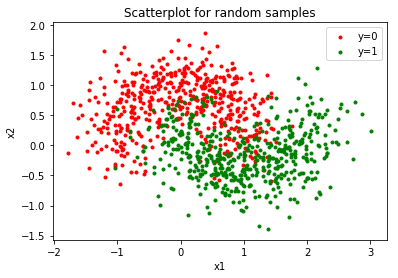

In [53]:
#(b)
import matplotlib.pyplot as plt

plt.scatter(x1[y==0], x2[y==0],c="red",label="y=0", marker = '.')
plt.scatter(x1[y==1], x2[y==1],c="green",label="y=1", marker= '.')
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Scatterplot for random samples")
plt.legend()
plt.show()

In [122]:
#(c)
import numpy.random as rd

sub1 = rd.choice(1000,100)
sub2 = rd.choice(1000,100)
sub3 = rd.choice(1000,100)
x1_sub1 = x1[sub1]
x2_sub1 = x2[sub1]
y_sub1 = y[sub1]
x1_sub2 = x1[sub2]
x2_sub2 = x2[sub2]
y_sub2 = y[sub2]
x1_sub3 = x1[sub3]
x2_sub3 = x2[sub3]
y_sub3 = y[sub3]

IndexError: index 396 is out of bounds for axis 1 with size 6

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given a dataset below that is partitioned into a training and testing dataset. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** A linear model does not mean that non-linear relationships cannot be explored. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

In [6]:
x_train = [3.19,9.26,9.38,8.77,7.91,3.79,3.18,7.61,2.36,6.26,6.62,1.53,6.25,7.93,7.07,4.58,4.14,2.14,9.04,4.56,3.99,6.71,2.51,0.84,6.13,5.22,0.25,3.60,1.36,5.59,4.81,1.14,0.36,2.31,1.37,5.86,4.23,9.48,2.26,0.77,4.33]
y_train = [46.40,172.16,209.00,203.31,82.88,62.57,14.38,177.00,8.01,82.35,84.84,-5.59,54.96,167.17,83.09,-21.63,94.64,63.97,106.57,38.99,88.26,66.99,-11.12,-0.44,65.08,61.47,-0.61,23.85,10.55,83.69,54.35,51.82,-18.63,1.98,4.90,55.44,50.09,155.66,45.57,18.12,30.58]

x_test = [5.65,0.07,8.84,5.14,6.65,1.35,5.45,7.39,3.35]
y_test = [98.52,16.09,198.45,75.90,85.11,47.64,14.76,141.03,-39.13]

**ANSWER**